In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [29]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.

df['y'] = data.target[0:178] ## YOUR CODE HERE # label

df['y']


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: y, Length: 178, dtype: int64

In [30]:
#How many samples and features are there?

# YOUR CODE HERE
n_samples, n_features = df.shape
print('number of samples:', n_samples, 'number of features:', n_features)

number of samples: 178 number of features: 14


In [31]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
print(df.y.value_counts())

1    71
0    59
2    48
Name: y, dtype: int64


In [32]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df_mean = df.mean()
df_median = df.median()
df_sd = df.std()


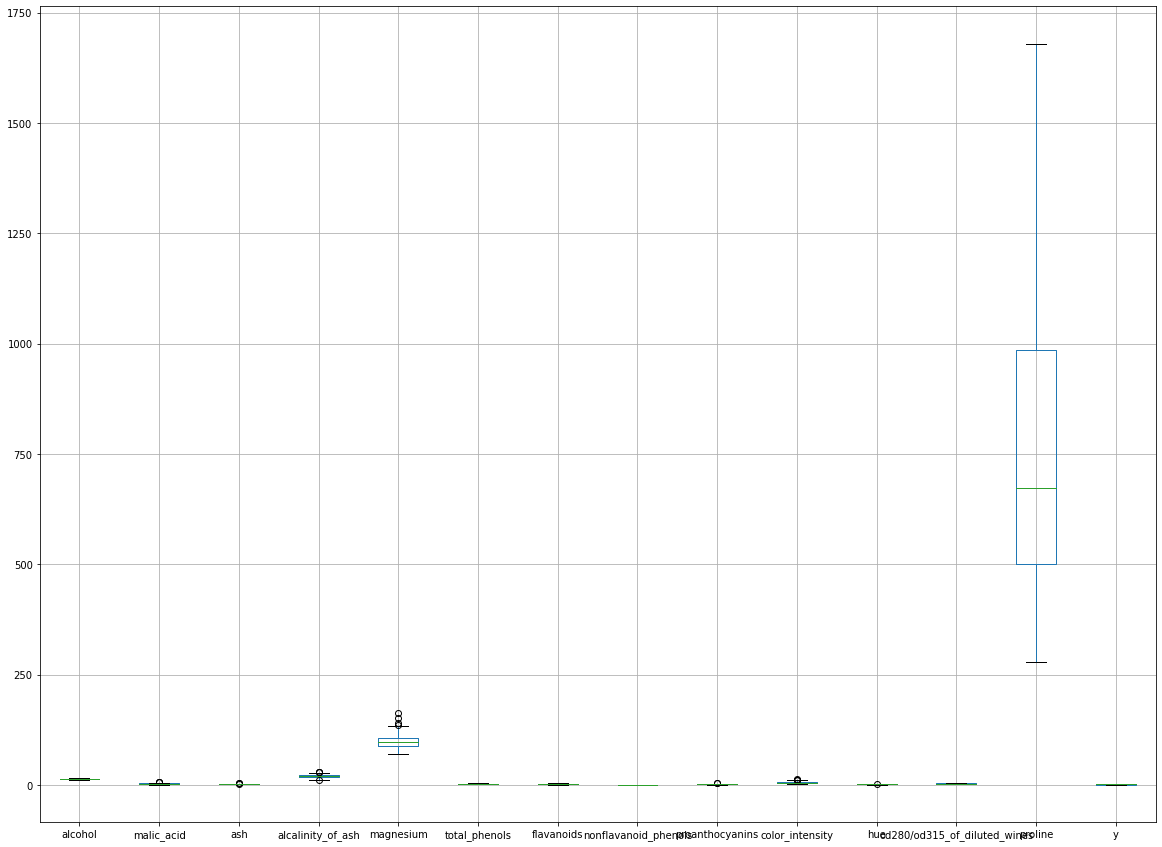

In [35]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
_ = df.boxplot(figsize=(20,15))

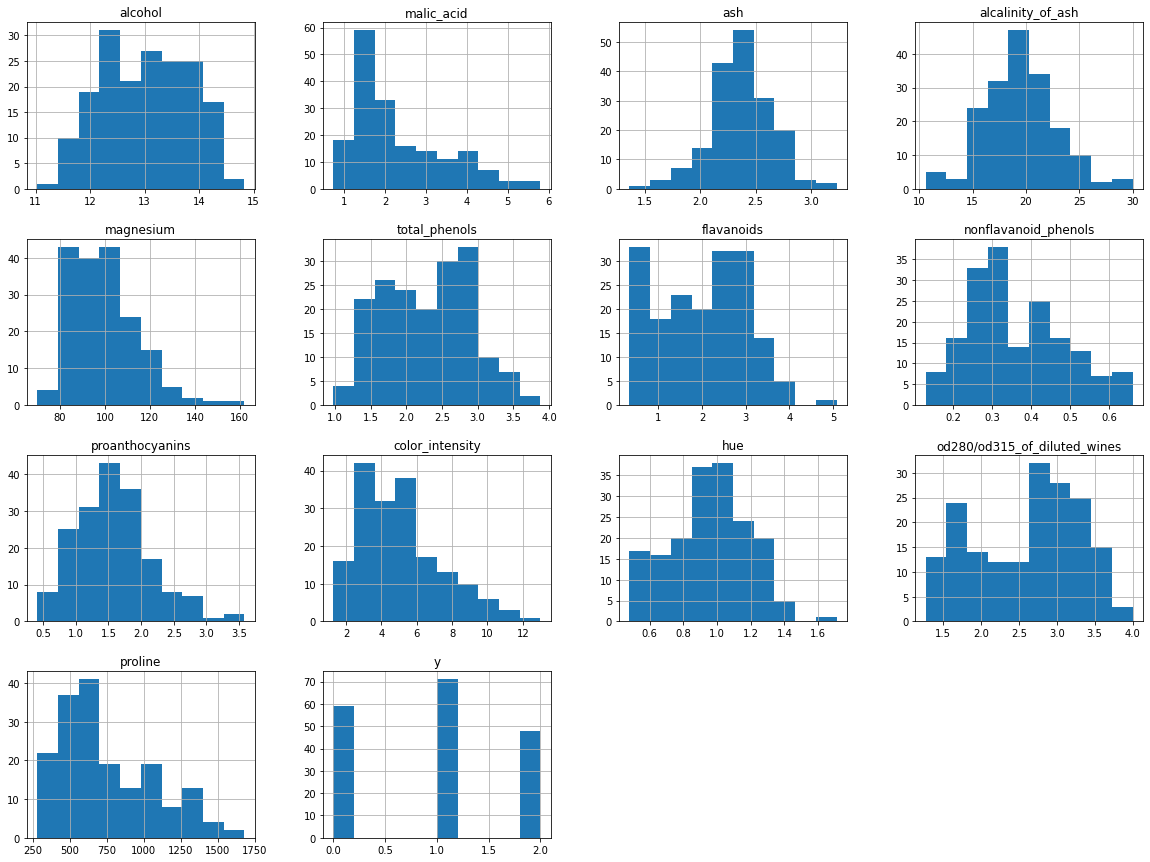

In [36]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
_ = df.hist(figsize=(20,15))

Let's do some multivariate analysis

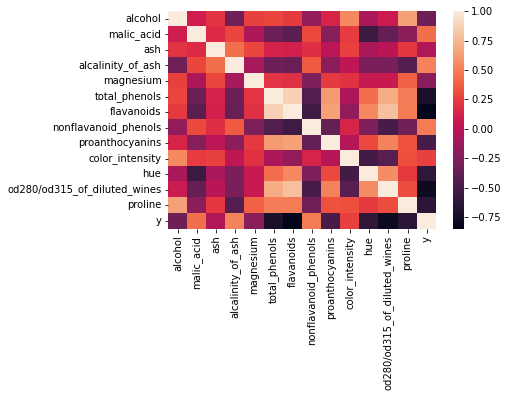

In [39]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE

corr = df.corr()

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE
sns.heatmap(corr)

In [ ]:
# What is the highest correlation between features?



You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [72]:
from pandas.core.reshape.concat import concat
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
scaler = StandardScaler()
scal_df = scaler.fit_transform(df.iloc[:,0:-1])
y = np.array(df.iloc[:,-1:])
scal_df = np.concatenate((scal_df, y), axis=1)

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(scal_df)



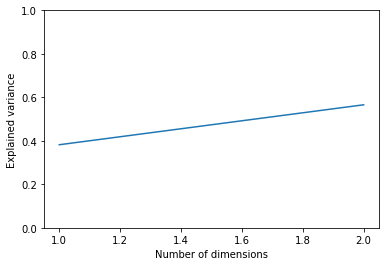

In [73]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
c = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(c)+1), c)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained variance")
plt.ylim(0, 1)
plt.show()

In [75]:
# Choose number of components based on explained variance:
pca_n = PCA(n_components=0.95)
wine_pca_n = pca_n.fit_transform(scal_df)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.38203095, 0.56567328, 0.67202328, 0.73992345, 0.8037677 ,
       0.85239334, 0.89305614, 0.91874902, 0.9402075 , 0.95917177])

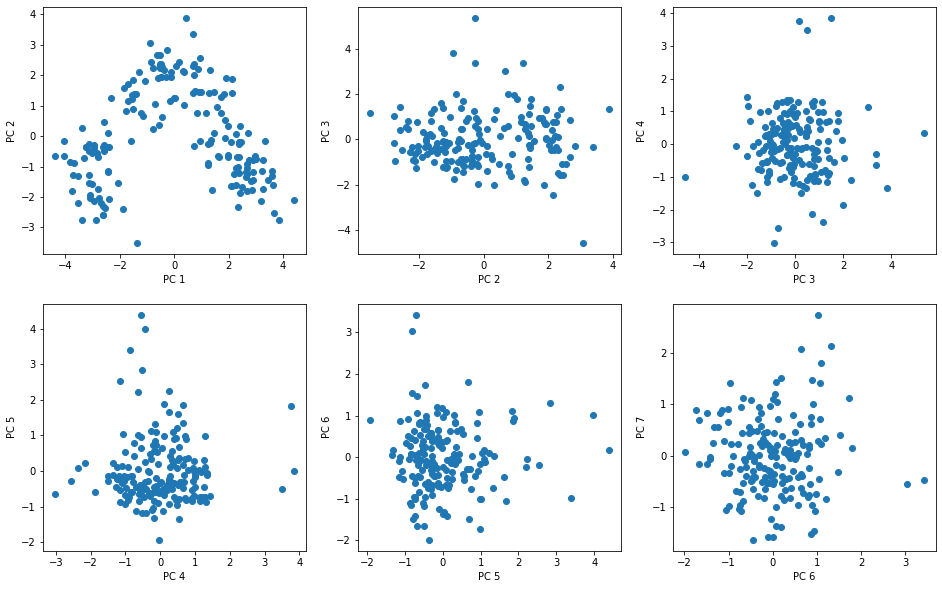

In [77]:
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(wine_pca_n[:, i-1], wine_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.show()

IndexError: ignored

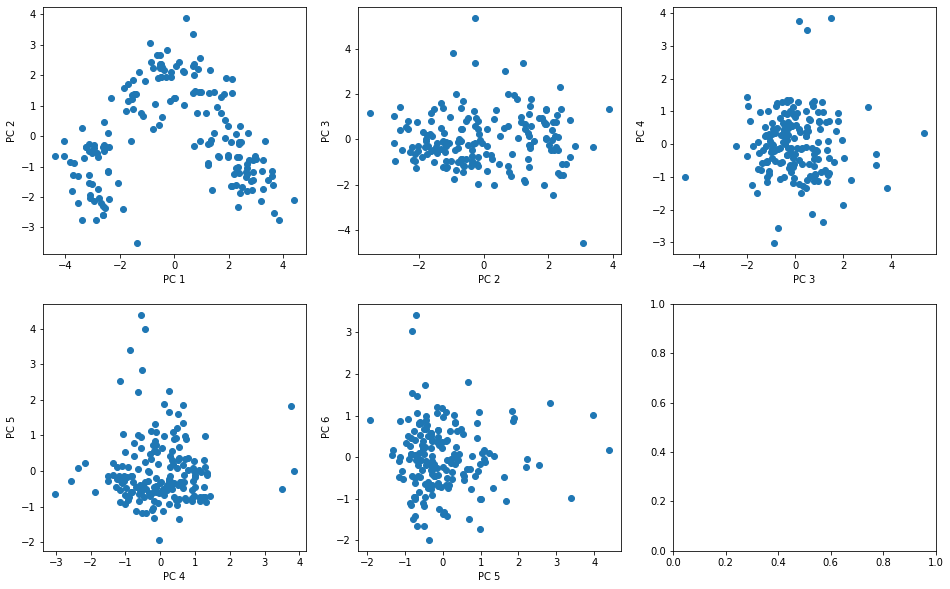

In [81]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca_n = PCA(n_components=0.85)
wine_pca_n = pca_n.fit_transform(scal_df)
np.cumsum(pca_n.explained_variance_ratio_)
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(wine_pca_n[:, i-1], wine_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.show()

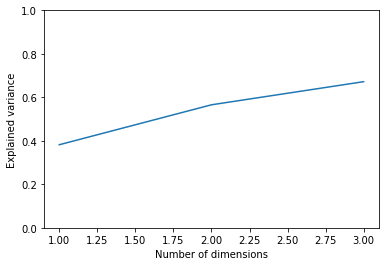

array([0.38203095, 0.56567328, 0.67202328])

In [83]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca = PCA(n_components=3)
wine_pca = pca.fit_transform(scal_df)
c = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(c)+1), c)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained variance")
plt.ylim(0, 1)
plt.show()
c

## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
X_std = StandardScaler().fit_transform(students_pca_n)
clusterer = KMeans(n_clusters=2)
clusterer.fit(X_std[:, 1:3])
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(X_std[:, i-1], X_std[:, i], c=clusterer.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.show()

In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!